In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow import keras 
from keras import layers
from keras import models 
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import os
warnings.filterwarnings("ignore")

In [2]:
print(os.listdir("/kaggle/input/dogs-vs-cats"))

['test1.zip', 'train.zip', 'sampleSubmission.csv']


In [3]:
import zipfile
zip_files = ['test1','train']
for zip_file in zip_files:
    with zipfile.ZipFile(f'/kaggle/input/dogs-vs-cats/{zip_file}.zip','r') as file:
        file.extractall(".")
        print("{} unzipped successfully".format(zip_file))

test1 unzipped successfully
train unzipped successfully


In [4]:
print(os.listdir("."))
train_path="./train"
file_names=os.listdir(train_path)
print("train samples ",len(file_names))
print(file_names[:3])

['train', '__notebook__.ipynb', 'test1']
train samples  25000
['dog.3958.jpg', 'dog.7789.jpg', 'dog.1647.jpg']


In [5]:
test_path="./test1"
file_names=os.listdir(test_path)
print("test samples ",len(file_names))
print(file_names[:3])

test samples  12500
['12022.jpg', '2229.jpg', '1019.jpg']


In [6]:
def path_to_frame(files):
    paths,labels=[],[]
    path=f"./{files}"
    file_names=os.listdir(path)
    for name in file_names:
        paths.append(name)
        labels.append(name[:3])
    return pd.DataFrame({"path":paths,"target":labels})

In [7]:
train_df=path_to_frame("train")
test_df=path_to_frame("test1")
print("train shape",train_df.shape)
print("test shape", test_df.shape)

train shape (25000, 2)
test shape (12500, 2)


In [8]:
print("train: ")
print(train_df.head(2))
print()
print("test: ")
print(test_df.head(2))

train: 
           path target
0  dog.3958.jpg    dog
1  dog.7789.jpg    dog

test: 
        path target
0  12022.jpg    120
1   2229.jpg    222


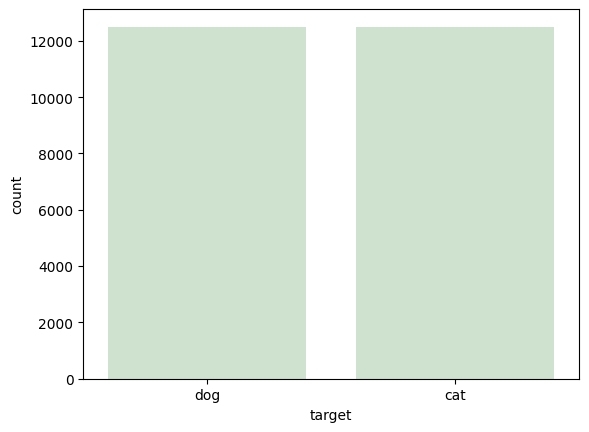

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns 

sns.countplot(x=train_df["target"],alpha=0.2,color="g")
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

train_df,valid_df=train_test_split(train_df,test_size=0.2,stratify=train_df["target"],random_state=42)

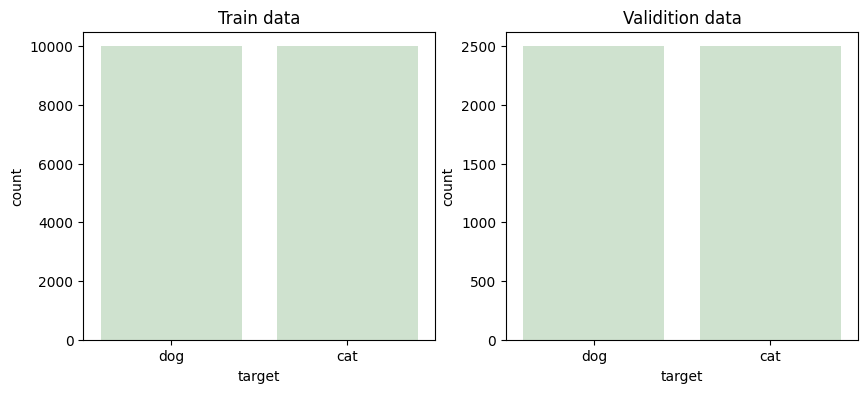

In [11]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,4))
sns.countplot(x=train_df["target"],alpha=0.2,color="g",ax=ax[0])
ax[0].set_title("Train data")
sns.countplot(x=valid_df["target"],alpha=0.2,color="g",ax=ax[1])
ax[1].set_title("Validition data")
plt.show()

In [12]:
train_datagen=ImageDataGenerator(
    rescale=1/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)
training_data = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory='./train',
    x_col = 'path',
    y_col='target',
    target_size=(150,150),
    class_mode='binary',
    batch_size=50) 

Found 20000 validated image filenames belonging to 2 classes.


In [13]:
valid_datagen=ImageDataGenerator(rescale=1/255)

validation_data = valid_datagen.flow_from_dataframe(
    dataframe=valid_df,
    directory='./train',
    x_col = 'path',
    y_col='target',
    target_size=(150,150),
    class_mode='binary',
    batch_size=50) 

Found 5000 validated image filenames belonging to 2 classes.


In [14]:
test_df=test_df.drop("target",axis=1)
test_datagen=ImageDataGenerator(rescale=1/255)

test_data = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory='./test1',
    x_col = 'path',
    y_col=None,
    target_size=(150,150),
    class_mode=None,
    batch_size=50) 

Found 12500 validated image filenames.


Training samples



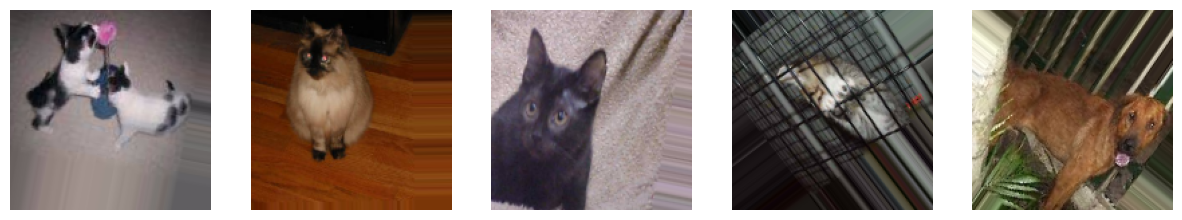

Validation samples



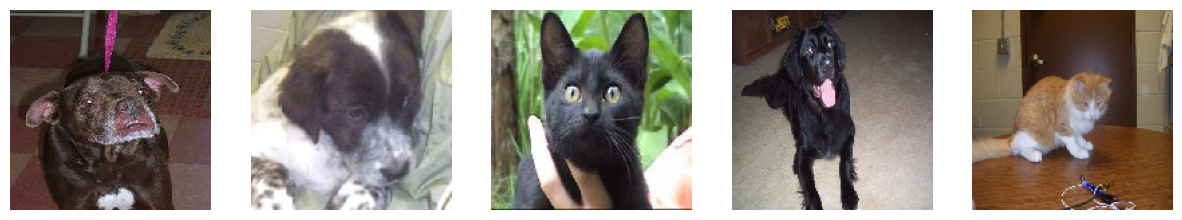

Test samples



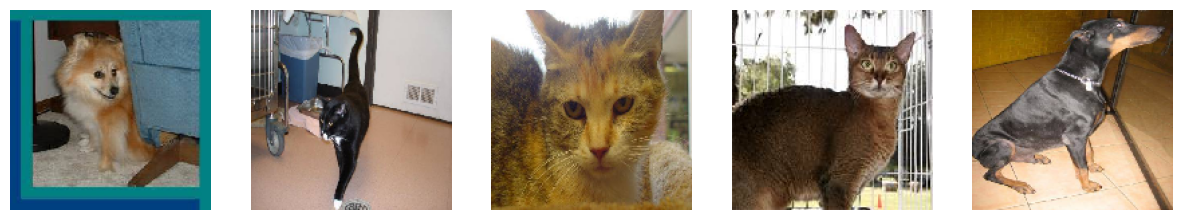

In [15]:
counts, idx = 5, 0
print("Training samples",end="\n\n")
fig, ax = plt.subplots(1, counts, figsize=(15, 5))
for img_batch, _ in training_data:  # Unpack batch to separate images and labels
    # Display one sample image from the batch
    ax[idx].imshow(img_batch[0])
    ax[idx].axis("off") 
    idx += 1
    if idx == counts:
        break

plt.show()


counts, idx = 5, 0
print("Validation samples",end="\n\n")
fig, ax = plt.subplots(1, counts, figsize=(15, 5))
for img_batch, _ in validation_data:  # Unpack batch to separate images and labels
    # Display one sample image from the batch
    ax[idx].imshow(img_batch[0])
    ax[idx].axis("off") 
    idx += 1
    if idx == counts:
        break

plt.show()


counts, idx = 5, 0
print("Test samples",end="\n\n")
fig, ax = plt.subplots(1, counts, figsize=(15, 5))
for img_batch in test_data:  # Unpack batch to separate images and labels
    # Display one sample image from the batch
    ax[idx].imshow(img_batch[0])
    ax[idx].axis("off") 
    idx += 1
    if idx == counts:
        break

plt.show()

In [16]:
model=models.Sequential(
[
    layers.Conv2D(32,(3,3),input_shape=(150,150,3,),activation="relu"),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Dropout((0.5)),

    layers.Conv2D(128,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(128,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dropout((0.5)),
    layers.Dense(512,activation="relu"),
    layers.Dense(1,activation="sigmoid")
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

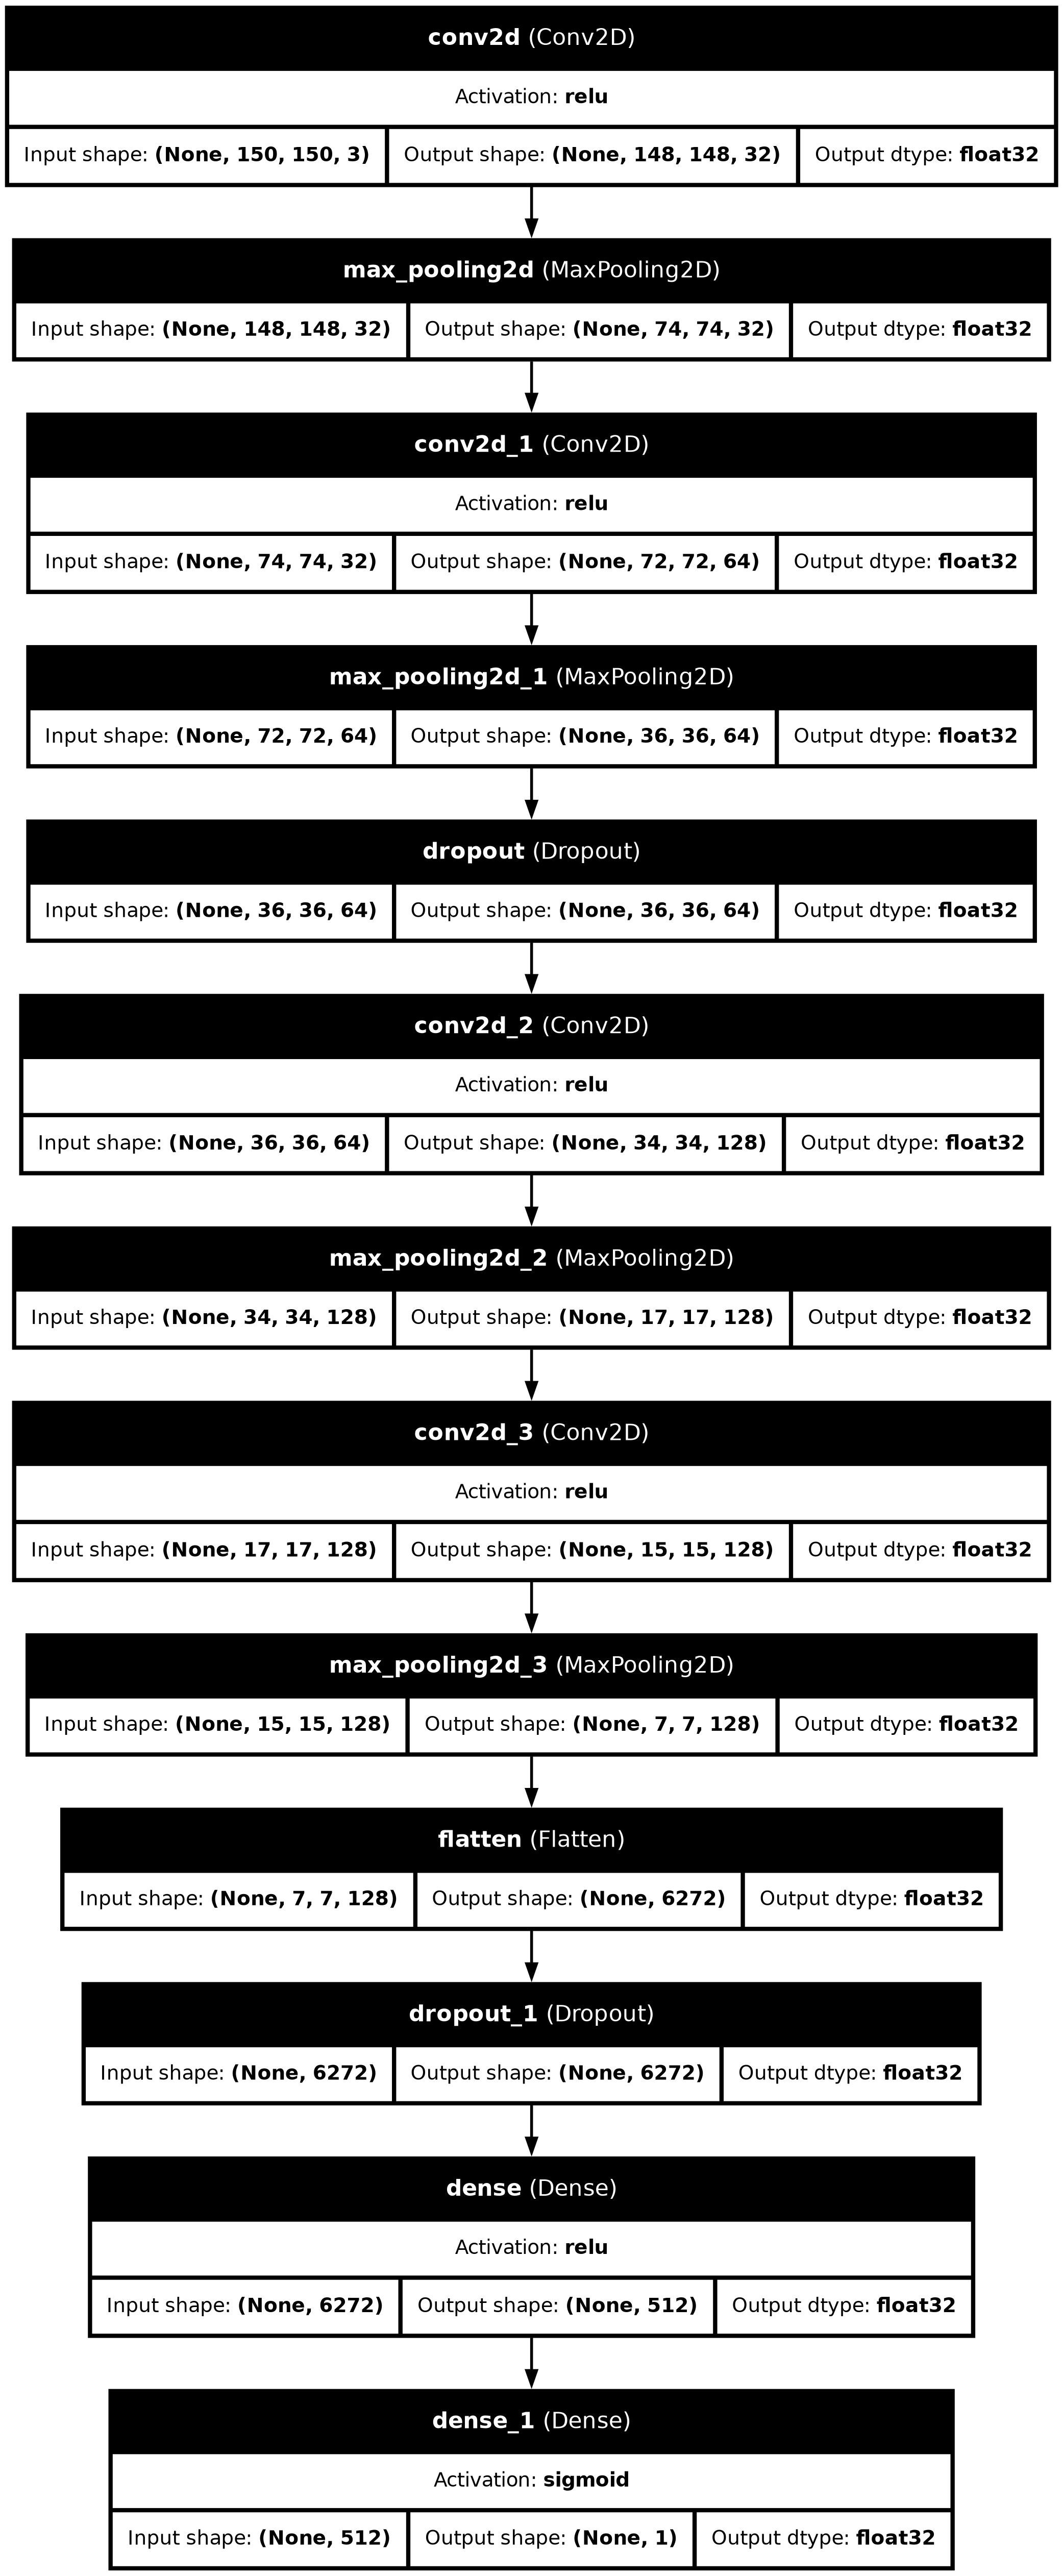

In [17]:
model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)
keras.utils.plot_model(model,show_layer_activations=True,show_layer_names=True,show_shapes=True,show_dtype=True)

In [18]:
history=model.fit(
    training_data,
    steps_per_epoch=train_df.shape[0]//32,
    epochs=10,
    validation_data= validation_data, 
    validation_steps= valid_df.shape[0]// 32,
)

Epoch 1/10


I0000 00:00:1731947230.290978      67 service.cc:145] XLA service 0x7c812c003380 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731947230.291037      67 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


  1/625 ━━━━━━━━━━━━━━━━━━━━ 1:50:04 11s/step - accuracy: 0.5000 - loss: 0.7304

I0000 00:00:1731947236.739898      67 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


625/625 ━━━━━━━━━━━━━━━━━━━━ 131s 192ms/step - accuracy: 0.5200 - loss: 0.7060 - val_accuracy: 0.5290 - val_loss: 0.6891
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 123s 193ms/step - accuracy: 0.5533 - loss: 0.6847 - val_accuracy: 0.5758 - val_loss: 0.6790
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 123s 193ms/step - accuracy: 0.5783 - loss: 0.6750 - val_accuracy: 0.6290 - val_loss: 0.6465
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 141s 193ms/step - accuracy: 0.6009 - loss: 0.6630 - val_accuracy: 0.6140 - val_loss: 0.6412
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 122s 192ms/step - accuracy: 0.6453 - loss: 0.6297 - val_accuracy: 0.7130 - val_loss: 0.5703
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 121s 191ms/step - accuracy: 0.6889 - loss: 0.5880 - val_accuracy: 0.7002 - val_loss: 0.5984
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 121s 190ms/step - accuracy: 0.6982 - loss: 0.5778 - val_accuracy: 0.7006 - val_loss: 0.5588
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 122s 192ms/step - accuracy: 0.7183 - loss: 0.55

In [19]:
def plot_model_parameters(history):
    acc=history["accuracy"]
    val_acc=history["val_accuracy"]
    loss=history["loss"]
    val_loss=history["val_loss"]
    fig, ax = plt.subplots(2, 1, figsize = (8, 10))

    epochs = range(1, len(acc) + 1)
    ax[0].plot(epochs, acc, '--', label='Training acc')
    ax[0].plot(epochs, val_acc, label='Validation acc')
    ax[0].set_title('Training and validation accuracy')
    ax[0].set_ylim([0.0, 1.0])
    ax[0].legend()

    ax[1].plot(epochs, loss, '--', label='Training loss')
    ax[1].plot(epochs, val_loss, label='Validation loss')
    ax[1].set_title('Training and validation loss')
    ax[1].legend()
    
    plt.show()
    plot_model_parameters(history.history)

In [20]:
from keras.models import Sequential
from keras.applications.vgg16 import VGG16

model2 = Sequential([
    VGG16(include_top=False, pooling='max', input_shape=(150, 150, 3), weights='imagenet'),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Freeze the VGG16 model layers to prevent training
model2.layers[0].trainable = False

model2.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ ?                      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [21]:
model2.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

In [22]:
history=model2.fit(
    training_data,
    steps_per_epoch=train_df.shape[0]//32,
    epochs=10,
    validation_data= validation_data, 
    validation_steps= valid_df.shape[0]// 32,
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 134s 195ms/step - accuracy: 0.7982 - loss: 0.4503 - val_accuracy: 0.8852 - val_loss: 0.2624
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 123s 193ms/step - accuracy: 0.8368 - loss: 0.3628 - val_accuracy: 0.8852 - val_loss: 0.2568
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 123s 193ms/step - accuracy: 0.8457 - loss: 0.3506 - val_accuracy: 0.8776 - val_loss: 0.2795
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 122s 192ms/step - accuracy: 0.8463 - loss: 0.3457 - val_accuracy: 0.8988 - val_loss: 0.2408
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 122s 192ms/step - accuracy: 0.8406 - loss: 0.3453 - val_accuracy: 0.8942 - val_loss: 0.2485
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 123s 193ms/step - accuracy: 0.8522 - loss: 0.3381 - val_accuracy: 0.8908 - val_loss: 0.2638
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 123s 194ms/step - accuracy: 0.8459 - loss: 0.3416 - val_accuracy: 0.9018 - val_loss: 0.2321
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 123s 193ms/step - accuracy: 0.8509 -

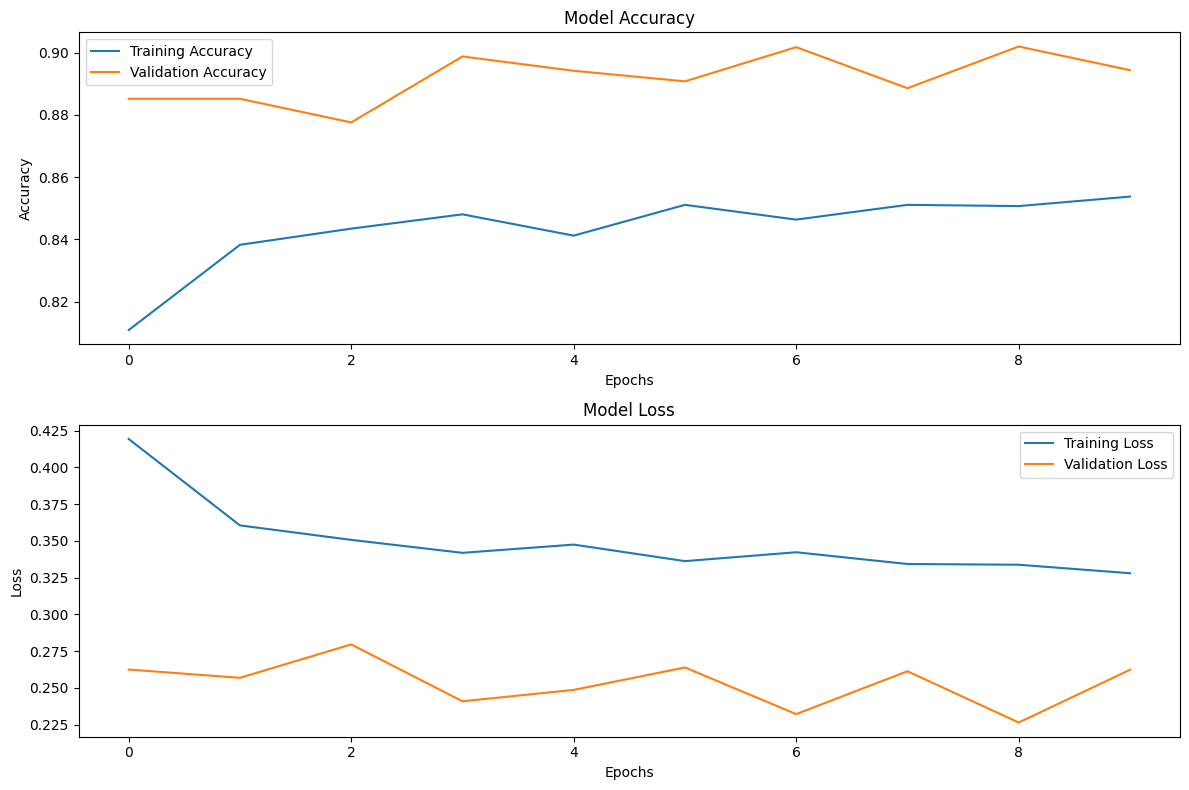

In [23]:
import matplotlib.pyplot as plt

# Function to plot model training parameters
def plot_model_parameters(history_dict):
    plt.figure(figsize=(12, 8))
    
    # Plot accuracy
    plt.subplot(2, 1, 1)
    plt.plot(history_dict['accuracy'], label='Training Accuracy')
    plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Plot loss
    plt.subplot(2, 1, 2)
    plt.plot(history_dict['loss'], label='Training Loss')
    plt.plot(history_dict['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Correct usage
plot_model_parameters(history.history)